<a href="https://colab.research.google.com/github/d-egan/cs7gv1_Assignment-1/blob/main/CS7GV1_Assignment_1_Take3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [3]:
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/images/england-3735180_640.jpg')
myimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
patches = extract_patches_2d(myimg, (16, 16))

In [56]:
patches = extract_patches_2d(img, (16, 16))

In [57]:
flat_patches = patches.reshape(256875, 16*16*3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(768,)


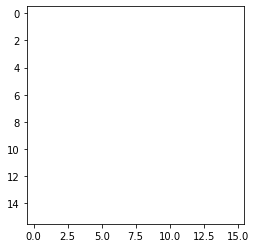

In [88]:
flat_mean_vec = np.mean(flat_patches, axis=0)
print(flat_mean_vec.shape)
plt.imshow(flat_mean_vec.reshape(16, 16, 3))
cv2_imshow(flat_mean_vec.reshape((16, 16, 3)))
##flat_mean_vec = mean_vec.reshape(16*16)
#print(flat_mean_vec)

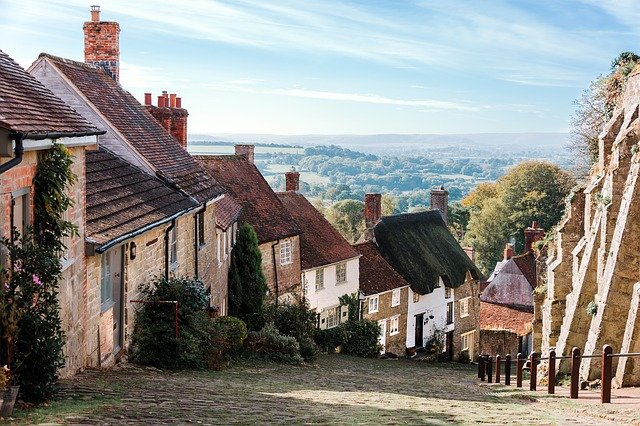

In [14]:
reconstruct = reconstruct_from_patches_2d(flat_patches.reshape(256875, 16, 16, 3), myimg.shape)
cv2_imshow(reconstruct)

In [59]:
centered_flat_patches = flat_patches - flat_mean_vec

In [60]:
C = np.dot(centered_flat_patches.T, centered_flat_patches)

In [61]:
from numpy import linalg as LA
U,S,V = LA.svd(C)

In [85]:
print(V[1])

[-3.35351385e-02 -3.29295343e-02 -3.16062944e-02 -3.72387612e-02
 -3.62236937e-02 -3.47472773e-02 -3.89521715e-02 -3.75459181e-02
 -3.60250981e-02 -3.85626059e-02 -3.68365889e-02 -3.53944128e-02
 -3.57600981e-02 -3.38200224e-02 -3.25929451e-02 -3.04107363e-02
 -2.83883956e-02 -2.75051255e-02 -2.27340731e-02 -2.07705212e-02
 -2.03388427e-02 -1.30463506e-02 -1.12883090e-02 -1.13786309e-02
 -1.94601137e-03 -5.21980418e-04 -1.16339141e-03  9.64781821e-03
  1.06476458e-02  9.47813102e-03  2.08003539e-02  2.13327015e-02
  1.96961827e-02  3.06190405e-02  3.06872042e-02  2.86814805e-02
  3.83664196e-02  3.80241993e-02  3.57754574e-02  4.35782055e-02
  4.29267399e-02  4.05848354e-02  4.59960258e-02  4.51750024e-02
  4.28974386e-02  4.52391941e-02  4.43906087e-02  4.23261699e-02
 -3.58964345e-02 -3.53016006e-02 -3.39683986e-02 -3.97000312e-02
 -3.87060685e-02 -3.72399710e-02 -4.13055595e-02 -3.99353300e-02
 -3.84493439e-02 -4.06218540e-02 -3.89523433e-02 -3.75725725e-02
 -3.73441415e-02 -3.54854

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

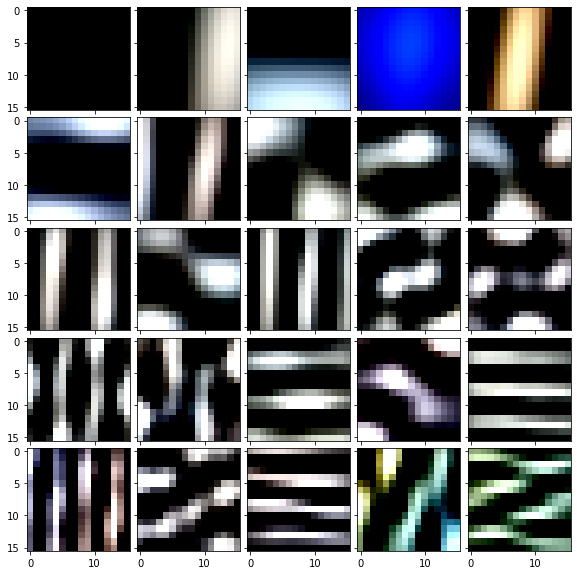

In [81]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
es = []
for v in V:
  #p = flat_mean_vec + (w * v)
  p =  v *20.0
  p = p.reshape(16, 16, 3)
  es.append(p)

for ax, im in zip(grid, es):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='viridis')

plt.show()
cv2_imshow(es[0])

In [68]:
def reconstruct_patch(vs, patch, mean_patch):
  scalars = np.dot(patch - mean_patch, vs)
  new_patch = mean_patch + np.dot(scalars, vs.T)
  return new_patch

In [69]:
def reconstruct_patch(vs, patch, mean_patch):
  #print(vs.shape)
  #scalars = np.dot((patch - mean_patch).T, vs.T)
  scalars = []
  patch = patch - mean_patch
  #print(vs.shape)
  for v in vs:
    #print(v.shape)
    scalars.append(np.dot(patch, v))
  scalars = np.array(scalars)
  #print(scalars.shape)
  new_patch = mean_patch + np.dot(scalars, vs)
  #print(new_patch.shape)
  return new_patch

In [77]:
patch = reconstruct_patch(V[:5, :], flat_patches[0,:], flat_mean_vec)
cv2_imshow(patch.reshape(16, 16, 3))

In [86]:
new_patches = []
for p in flat_patches:
  new_patch = reconstruct_patch(V[:1,:], p, flat_mean_vec)
  new_patches.append(new_patch.reshape(16, 16, 3))
new_patches = np.array(new_patches)
#cv2_imshow(new_patches)

(426, 640, 3)


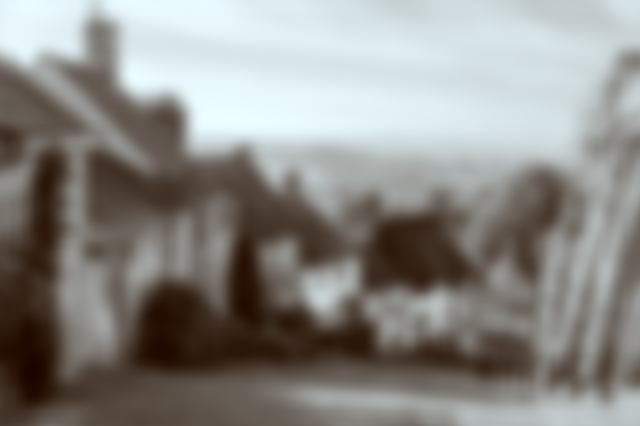

In [87]:
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
reconstruct = reconstruct_from_patches_2d(np.array(new_patches).reshape(256875, 16, 16, 3), img.shape)
print(reconstruct.shape)
#reconstruct_rgb = cv2.cvtColor(reconstruct, cv2.COLOR_RGB2BGR)
#cv2_imshow(cv2.cvtColor(reconstruct, cv2.COLOR_RGB2BGR))
cv2_imshow(reconstruct)
#plt.imshow(reconstruct)
#print(reconstruct)